# Set Parameter
- Attention = Luong
- Teacher Forcing Ratio = 0.5
- Layer = 1
- Batch size = 32
- Drop out = 0.2
- Hidden unit = 50
- Epochs = 100
- N = 100
- Data Length = 10K
- Data = [Ctype2, Ctype4, Ctype6, Ctype8]
- Deduplication & Random Split

# Import packages

import useful packages for experiments

In [1]:
import os
import argparse
import logging

import torch
from torch.optim.lr_scheduler import StepLR
import torchtext

from trainer.supervised_trainer import SupervisedTrainer
from trainer.supervised_trainer_unmatching import SupervisedTrainer_unmatching
from models.encoderRNN import EncoderRNN
from models.decoderRNN import DecoderRNN
from models.seq2seq import Seq2seq
from loss.loss import Perplexity
from optim.optim import Optimizer
from dataset import fields
from evaluator.predictor import Predictor

import matplotlib.pyplot as plt

/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))


# Log format

In [2]:
log_level = 'info'
LOG_FORMAT = '%(asctime)s %(levelname)-6s %(message)s'
logging.basicConfig(format=LOG_FORMAT, level=getattr(logging, log_level.upper()))

In [3]:
data_name = ["Bracket_rand_Ctype2", "Bracket_rand_Ctype4", "Bracket_rand_Ctype6", "Bracket_rand_Ctype8"]
data_path = ["N100", "Ctype4", "Ctype6", "Ctype8"]
character_accuracy = []
sentance_accuracy = []

# Prepare dataset

data : Bracket_rand_Ctype2


/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/modules/rnn.py:38: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
2019-02-27 01:30:39,033 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
2019-02-27 01:31:22,008 INFO   Finished epoch 1: Train loss: 20.4056,

2019-02-27 02:25:06,695 INFO   Finished epoch 53: Train loss: 1.6934, Dev loss: 2.0932, Accuracy(Character): 0.7098, Accuracy(Word): 0.1986
2019-02-27 02:26:15,170 INFO   Finished epoch 54: Train loss: 1.6355, Dev loss: 1.8605, Accuracy(Character): 0.7405, Accuracy(Word): 0.2078
2019-02-27 02:27:26,676 INFO   Finished epoch 55: Train loss: 1.5913, Dev loss: 2.0741, Accuracy(Character): 0.7329, Accuracy(Word): 0.1932
2019-02-27 02:28:33,221 INFO   Finished epoch 56: Train loss: 1.5874, Dev loss: 1.8434, Accuracy(Character): 0.7416, Accuracy(Word): 0.2206
2019-02-27 02:29:38,853 INFO   Finished epoch 57: Train loss: 1.6009, Dev loss: 2.0287, Accuracy(Character): 0.7472, Accuracy(Word): 0.1558
2019-02-27 02:30:45,940 INFO   Finished epoch 58: Train loss: 1.6400, Dev loss: 2.0922, Accuracy(Character): 0.7045, Accuracy(Word): 0.2108
2019-02-27 02:31:54,613 INFO   Finished epoch 59: Train loss: 1.6252, Dev loss: 1.9520, Accuracy(Character): 0.7560, Accuracy(Word): 0.2362
2019-02-27 02:33:00,

data : Bracket_rand_Ctype4


2019-02-27 03:17:55,255 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-27 03:19:04,000 INFO   Finished epoch 1: Train loss: 19.7087, Dev loss: 17.6934, Accuracy(Character): 0.0954, Accuracy(Word): 0.0000
2019-02-27 03:20:13,943 INFO   Finished epoch 2: Train loss: 15.3079, Dev loss: 16.9185, Accuracy(Character): 0.1052, Accuracy(Word): 0.0000
2019-02-27 03:21:19,275 INFO   Finished epoch 3: Train loss: 14.3859, Dev loss: 17.5106, Accuracy(Character): 0.1177, Accuracy(Word): 0.0000
2019-02-27 03:22:23,818 INFO   Finished epoch 4: Train loss: 16.5493, Dev loss: 18.5711, Accuracy(Character): 0.1158, Accuracy(Word): 0.0000
2019-02-27 03:23:20,348 INFO   Finished epoch 5: Train loss: 12.8099, Dev loss: 16.0271, Accuracy(Character): 0.1758, Accuracy(Word): 0.0118
2019-02-27 03:24:18,172 INFO   Finished epoch 6: Train loss: 10.5510, Dev loss: 9.1364, Accuracy(Character): 0.2410, 

2019-02-27 04:14:58,247 INFO   Finished epoch 59: Train loss: 1.4577, Dev loss: 1.5716, Accuracy(Character): 0.8256, Accuracy(Word): 0.2982
2019-02-27 04:15:58,336 INFO   Finished epoch 60: Train loss: 1.4695, Dev loss: 1.6434, Accuracy(Character): 0.8146, Accuracy(Word): 0.2724
2019-02-27 04:16:52,644 INFO   Finished epoch 61: Train loss: 1.5181, Dev loss: 1.6733, Accuracy(Character): 0.8045, Accuracy(Word): 0.2654
2019-02-27 04:17:49,316 INFO   Finished epoch 62: Train loss: 1.6487, Dev loss: 2.2169, Accuracy(Character): 0.6979, Accuracy(Word): 0.2762
2019-02-27 04:18:44,340 INFO   Finished epoch 63: Train loss: 1.4312, Dev loss: 1.6917, Accuracy(Character): 0.8008, Accuracy(Word): 0.2912
2019-02-27 04:19:43,228 INFO   Finished epoch 64: Train loss: 1.3376, Dev loss: 1.6081, Accuracy(Character): 0.8223, Accuracy(Word): 0.3242
2019-02-27 04:20:38,892 INFO   Finished epoch 65: Train loss: 1.3749, Dev loss: 1.4638, Accuracy(Character): 0.8503, Accuracy(Word): 0.3088
2019-02-27 04:21:32,

data : Bracket_rand_Ctype6


2019-02-27 04:53:46,365 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-27 04:54:41,343 INFO   Finished epoch 1: Train loss: 19.2234, Dev loss: 17.1977, Accuracy(Character): 0.1060, Accuracy(Word): 0.0000
2019-02-27 04:55:37,026 INFO   Finished epoch 2: Train loss: 14.8179, Dev loss: 16.1051, Accuracy(Character): 0.1066, Accuracy(Word): 0.0000
2019-02-27 04:56:27,608 INFO   Finished epoch 3: Train loss: 14.4331, Dev loss: 20.8401, Accuracy(Character): 0.0984, Accuracy(Word): 0.0000
2019-02-27 04:57:18,356 INFO   Finished epoch 4: Train loss: 16.4288, Dev loss: 21.2925, Accuracy(Character): 0.1309, Accuracy(Word): 0.0000
2019-02-27 04:58:11,227 INFO   Finished epoch 5: Train loss: 18.5957, Dev loss: 37.0719, Accuracy(Character): 0.1204, Accuracy(Word): 0.0040
2019-02-27 04:59:03,295 INFO   Finished epoch 6: Train loss: 18.6140, Dev loss: 25.8870, Accuracy(Character): 0.1373,

2019-02-27 05:44:50,469 INFO   Finished epoch 59: Train loss: 1.8962, Dev loss: 2.5132, Accuracy(Character): 0.6430, Accuracy(Word): 0.2552
2019-02-27 05:45:41,125 INFO   Finished epoch 60: Train loss: 1.9109, Dev loss: 2.6214, Accuracy(Character): 0.6362, Accuracy(Word): 0.2530
2019-02-27 05:46:33,684 INFO   Finished epoch 61: Train loss: 1.8629, Dev loss: 2.5014, Accuracy(Character): 0.6297, Accuracy(Word): 0.2524
2019-02-27 05:47:25,630 INFO   Finished epoch 62: Train loss: 1.8987, Dev loss: 2.4834, Accuracy(Character): 0.6406, Accuracy(Word): 0.2528
2019-02-27 05:48:17,675 INFO   Finished epoch 63: Train loss: 1.8519, Dev loss: 2.6259, Accuracy(Character): 0.6360, Accuracy(Word): 0.2206
2019-02-27 05:49:07,503 INFO   Finished epoch 64: Train loss: 1.8720, Dev loss: 2.5405, Accuracy(Character): 0.6325, Accuracy(Word): 0.2352
2019-02-27 05:49:57,013 INFO   Finished epoch 65: Train loss: 1.9127, Dev loss: 2.5624, Accuracy(Character): 0.6511, Accuracy(Word): 0.2640
2019-02-27 05:50:48,

data : Bracket_rand_Ctype8


2019-02-27 06:19:39,679 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-27 06:20:31,051 INFO   Finished epoch 1: Train loss: 20.0597, Dev loss: 17.3188, Accuracy(Character): 0.0974, Accuracy(Word): 0.0000
2019-02-27 06:21:21,967 INFO   Finished epoch 2: Train loss: 14.8967, Dev loss: 15.9756, Accuracy(Character): 0.1151, Accuracy(Word): 0.0000
2019-02-27 06:22:12,305 INFO   Finished epoch 3: Train loss: 14.1986, Dev loss: 20.4736, Accuracy(Character): 0.1202, Accuracy(Word): 0.0000
2019-02-27 06:23:04,639 INFO   Finished epoch 4: Train loss: 13.4874, Dev loss: 17.5197, Accuracy(Character): 0.1258, Accuracy(Word): 0.0020
2019-02-27 06:23:52,976 INFO   Finished epoch 5: Train loss: 15.2825, Dev loss: 41.3462, Accuracy(Character): 0.1126, Accuracy(Word): 0.0114
2019-02-27 06:24:41,638 INFO   Finished epoch 6: Train loss: 16.5928, Dev loss: 31.3694, Accuracy(Character): 0.1445,

2019-02-27 07:07:01,325 INFO   Finished epoch 59: Train loss: 1.5606, Dev loss: 1.7850, Accuracy(Character): 0.7731, Accuracy(Word): 0.2902
2019-02-27 07:07:40,890 INFO   Finished epoch 60: Train loss: 1.6437, Dev loss: 1.8788, Accuracy(Character): 0.7384, Accuracy(Word): 0.2916
2019-02-27 07:08:19,788 INFO   Finished epoch 61: Train loss: 1.5396, Dev loss: 1.9964, Accuracy(Character): 0.7472, Accuracy(Word): 0.3024
2019-02-27 07:08:59,001 INFO   Finished epoch 62: Train loss: 1.5809, Dev loss: 2.0117, Accuracy(Character): 0.7189, Accuracy(Word): 0.2752
2019-02-27 07:09:39,236 INFO   Finished epoch 63: Train loss: 1.5274, Dev loss: 1.8111, Accuracy(Character): 0.7608, Accuracy(Word): 0.2900
2019-02-27 07:10:19,056 INFO   Finished epoch 64: Train loss: 1.5298, Dev loss: 1.9096, Accuracy(Character): 0.7505, Accuracy(Word): 0.2930
2019-02-27 07:10:57,660 INFO   Finished epoch 65: Train loss: 1.5073, Dev loss: 1.9274, Accuracy(Character): 0.7403, Accuracy(Word): 0.3048
2019-02-27 07:11:37,

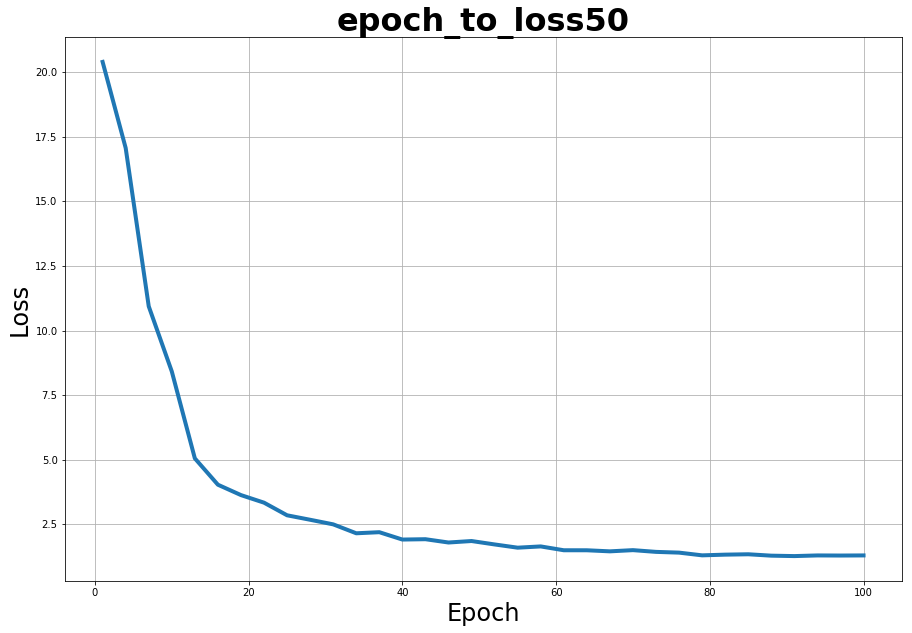

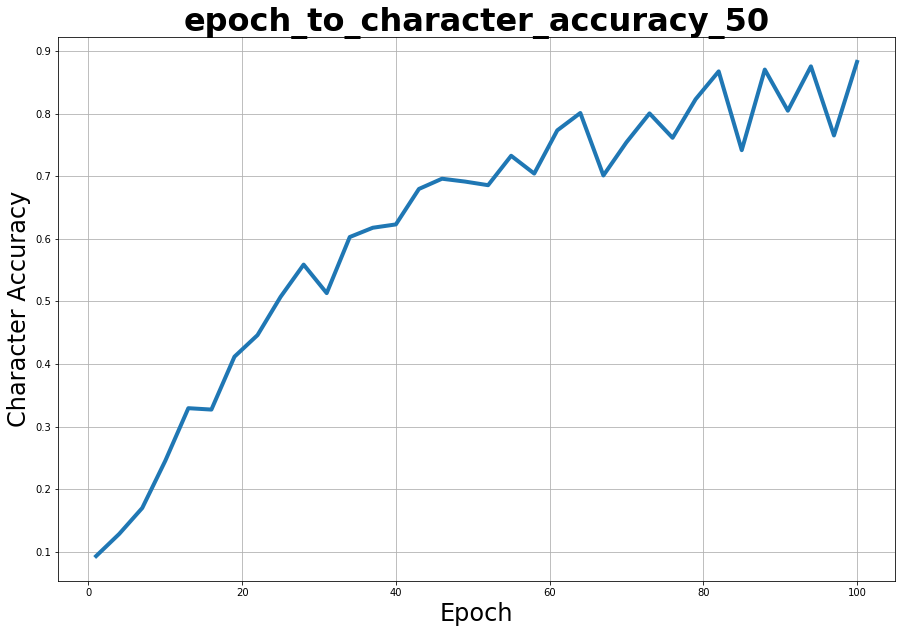

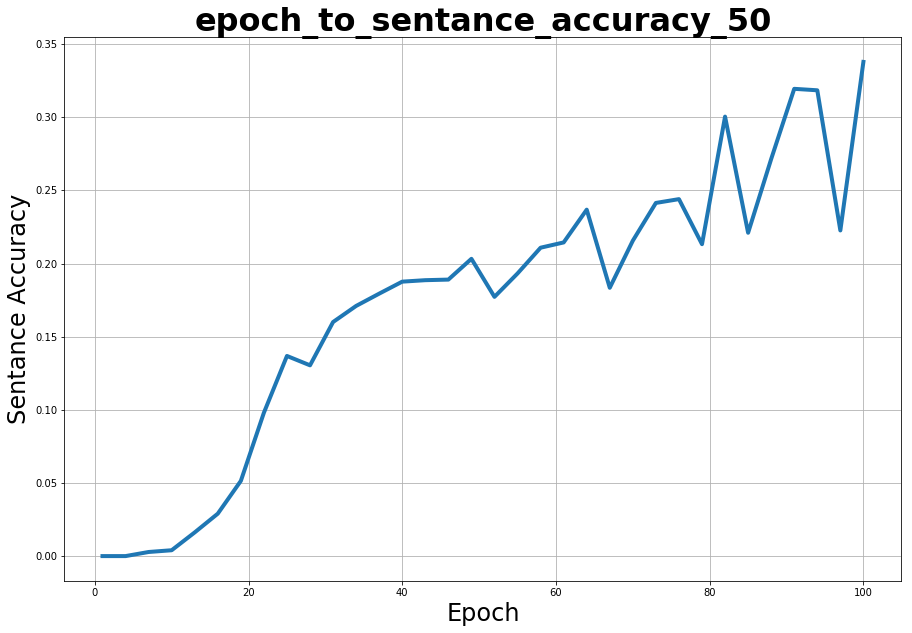

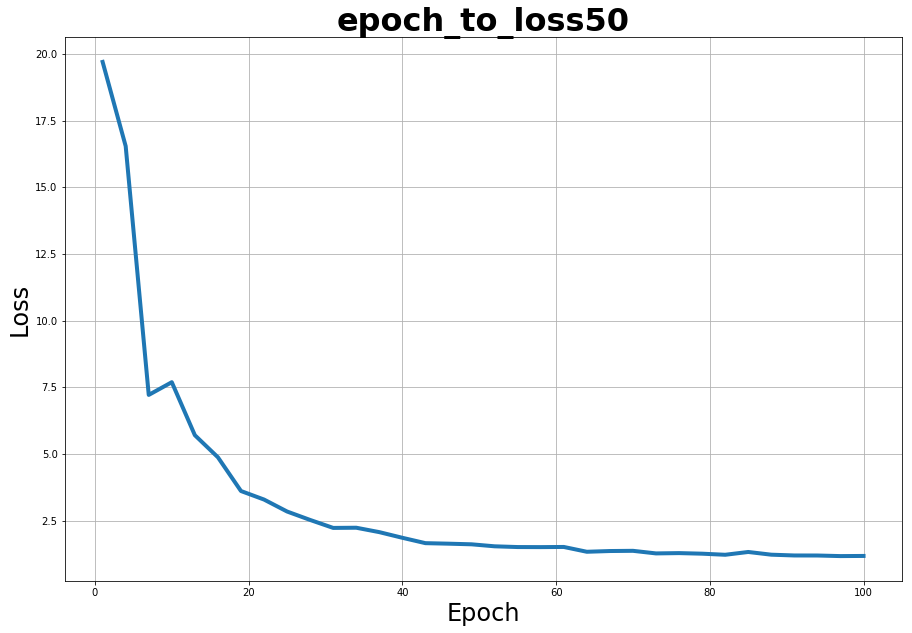

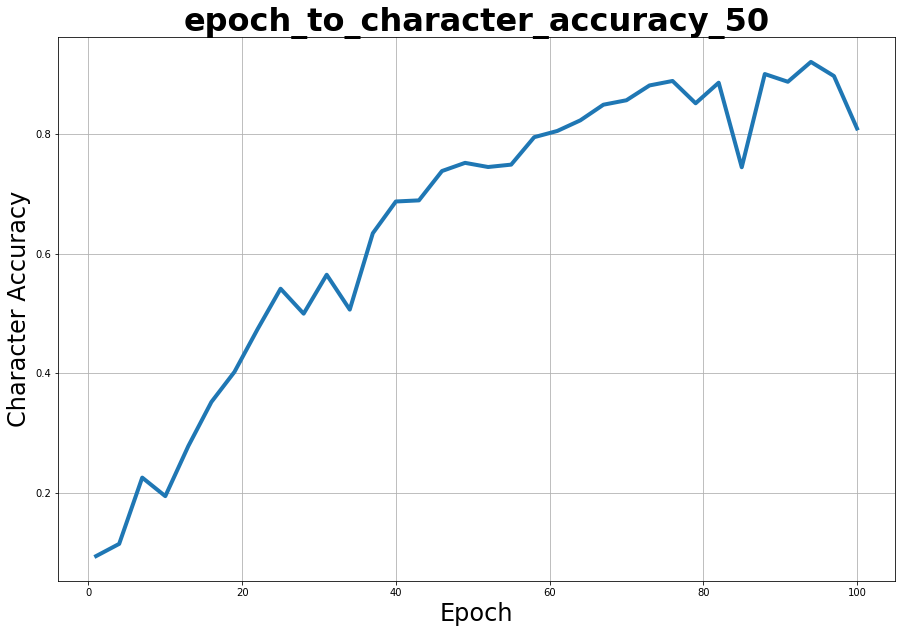

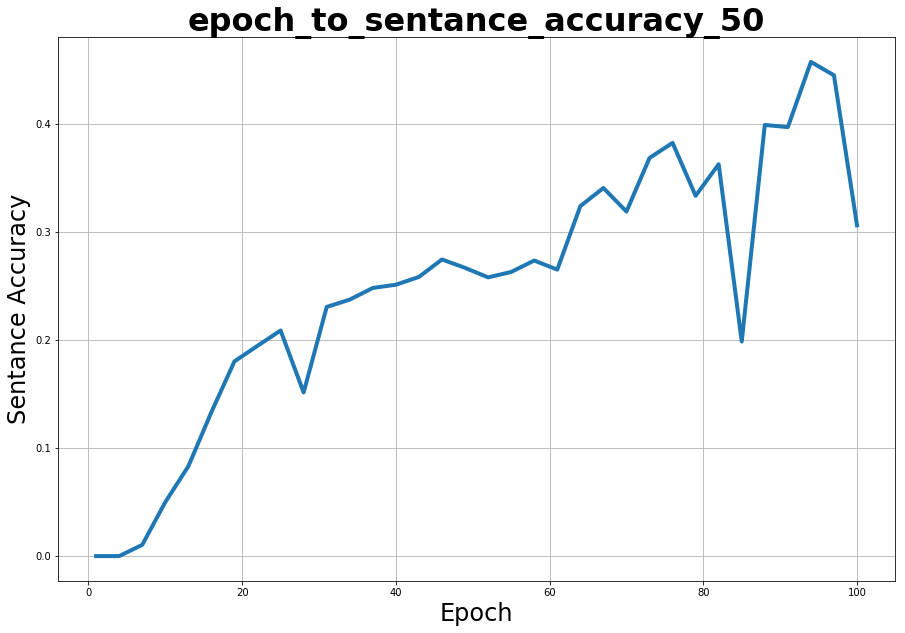

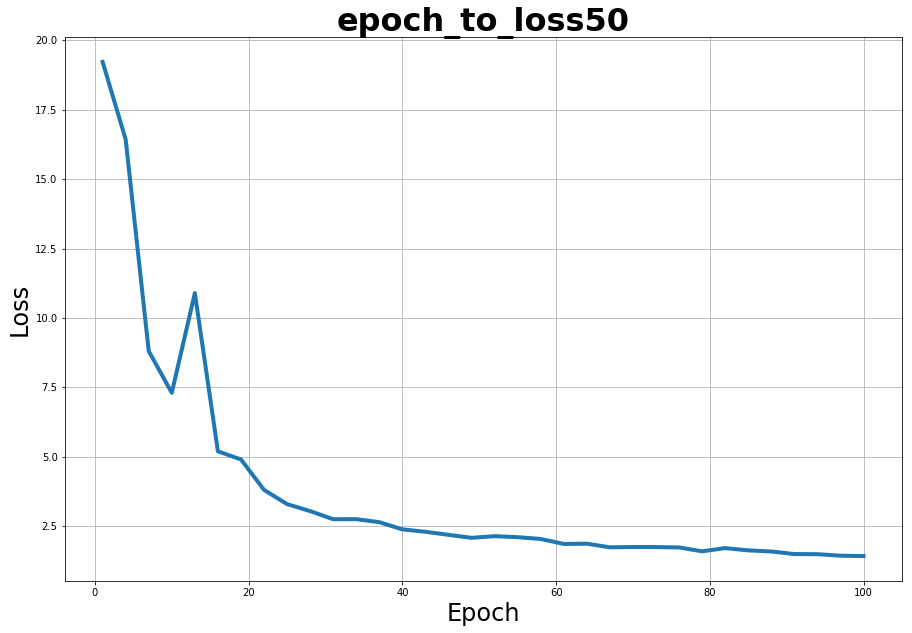

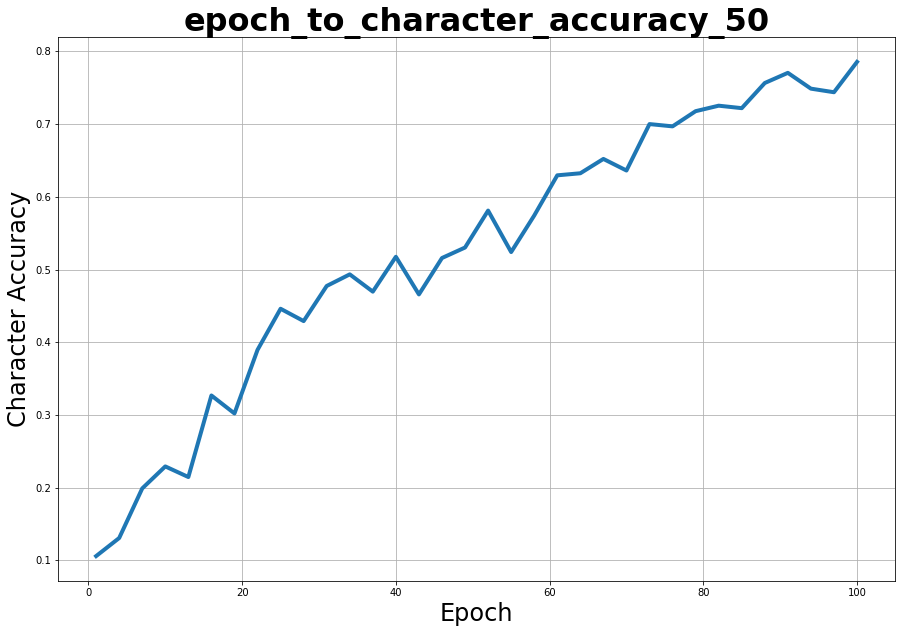

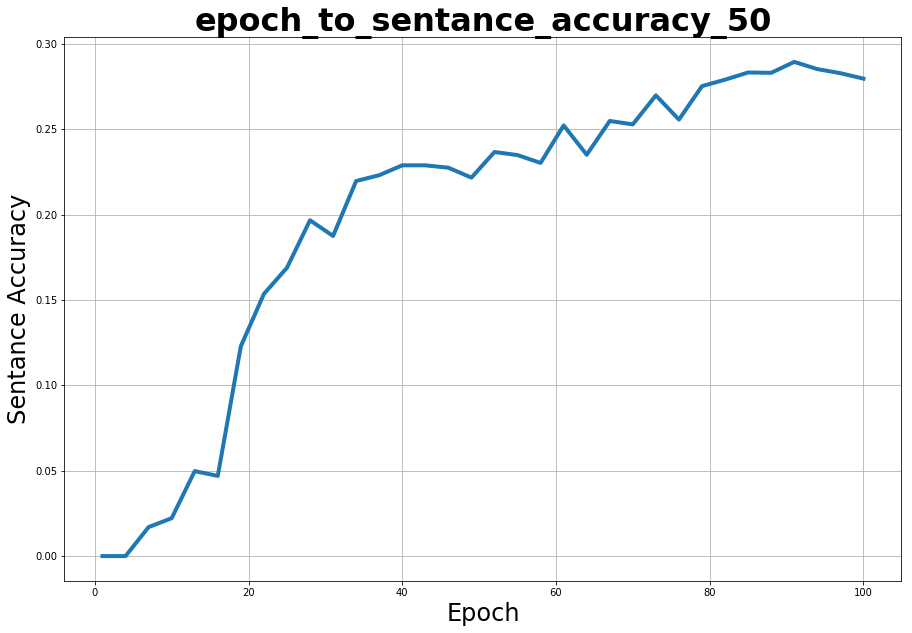

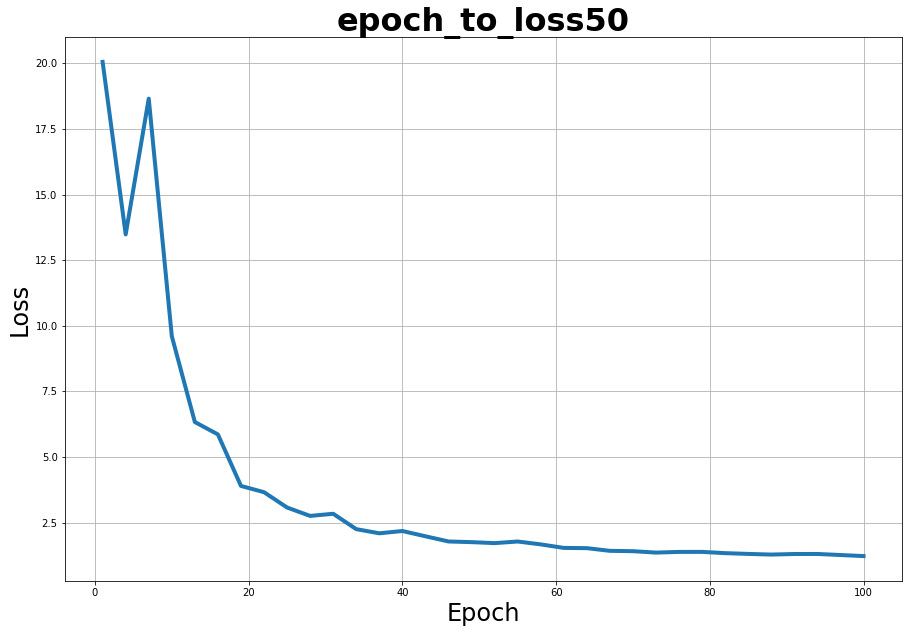

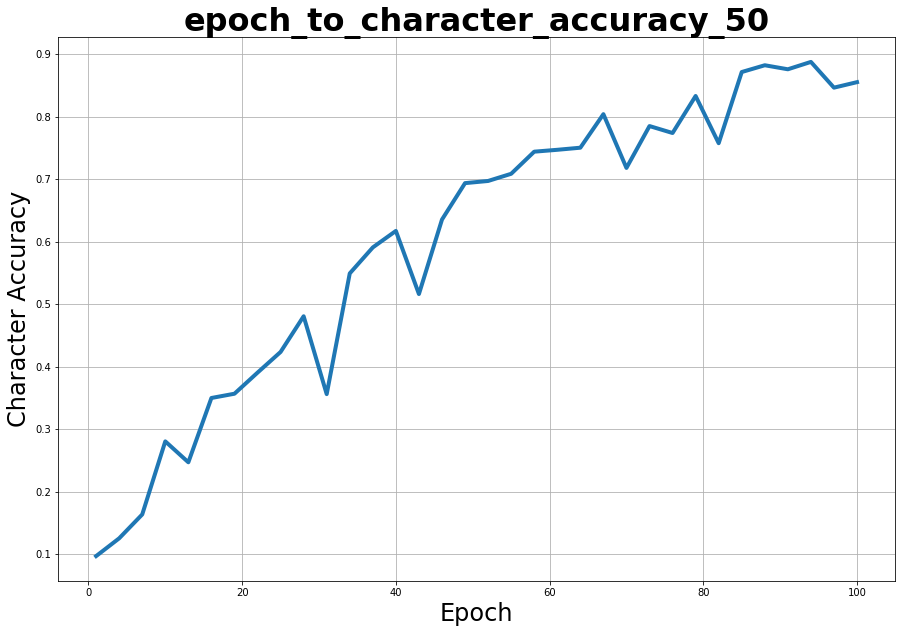

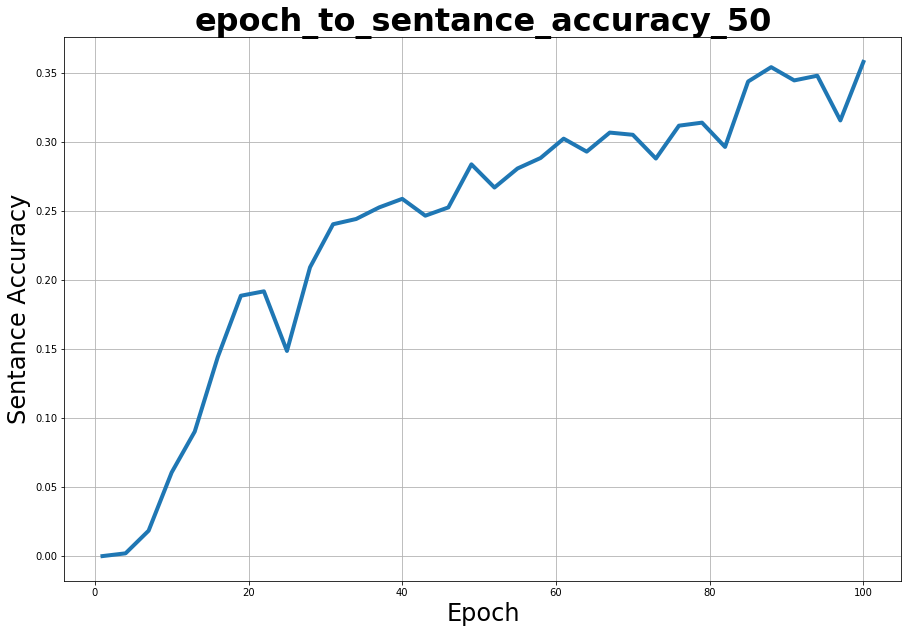

In [4]:
for i, j in zip(data_name, data_path):
    print("data : %s" % i)
    train_path = "data/bracket_rand/" + j + "/data_train.txt"
    dev_path = "data/bracket_rand/" + j + "/data_test.txt"

    src = fields.SourceField()
    tgt = fields.TargetField()
    max_len = 104
    def len_filter(example):
        return len(example.src) <= max_len and len(example.tgt) <= max_len
    train = torchtext.data.TabularDataset(
        path=train_path, format='tsv',
        fields=[('src', src), ('tgt', tgt)],
        filter_pred=len_filter
    )
    dev = torchtext.data.TabularDataset(
        path=dev_path, format='tsv',
        fields=[('src', src), ('tgt', tgt)],
        filter_pred=len_filter
    )
    src.build_vocab(train)
    tgt.build_vocab(train)
    input_vocab = src.vocab
    output_vocab = tgt.vocab

    weight = torch.ones(len(tgt.vocab))
    pad = tgt.vocab.stoi[tgt.pad_token]
    loss = Perplexity(weight, pad)
    if torch.cuda.is_available():
        loss.cuda()
    
    optimizer = "Adam"
    hidden_size = 50
    bidirectional = True

    seq2seq = None
    encoder = EncoderRNN(len(src.vocab), max_len, hidden_size,
                         bidirectional=bidirectional, variable_lengths=True)
    decoder = DecoderRNN(len(tgt.vocab), max_len, hidden_size * 2 if bidirectional else hidden_size,
                         dropout_p=0.2, use_attention="Luong", bidirectional=bidirectional,
                         eos_id=tgt.eos_id, sos_id=tgt.sos_id)
    seq2seq = Seq2seq(encoder, decoder)
    if torch.cuda.is_available():
        seq2seq.cuda()

    for param in seq2seq.parameters():
        param.data.uniform_(-0.08, 0.08)

    # train
    t = SupervisedTrainer(loss=loss, batch_size=32,
                          checkpoint_every=50,
                          print_every=100,
                          hidden_size=hidden_size,
                          path=i)

    seq2seq, ave_loss, character_accuracy_list, sentance_accuracy_list = t.train(seq2seq, train,
                                                                             num_epochs=100, dev_data=dev,
                                                                             optimizer=optimizer,
                                                                             teacher_forcing_ratio=0.5)

    character_accuracy.append(character_accuracy_list)
    sentance_accuracy.append(sentance_accuracy_list)

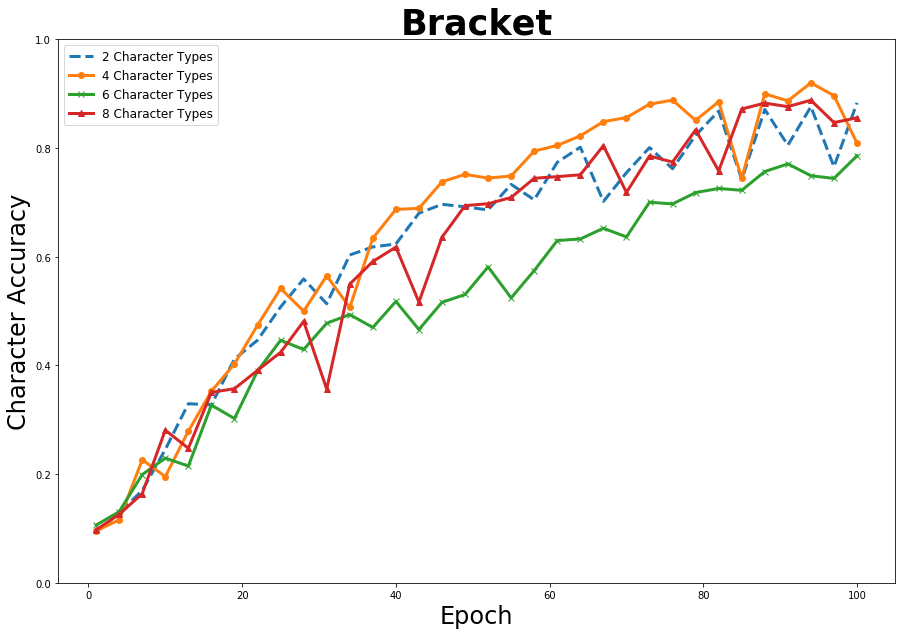

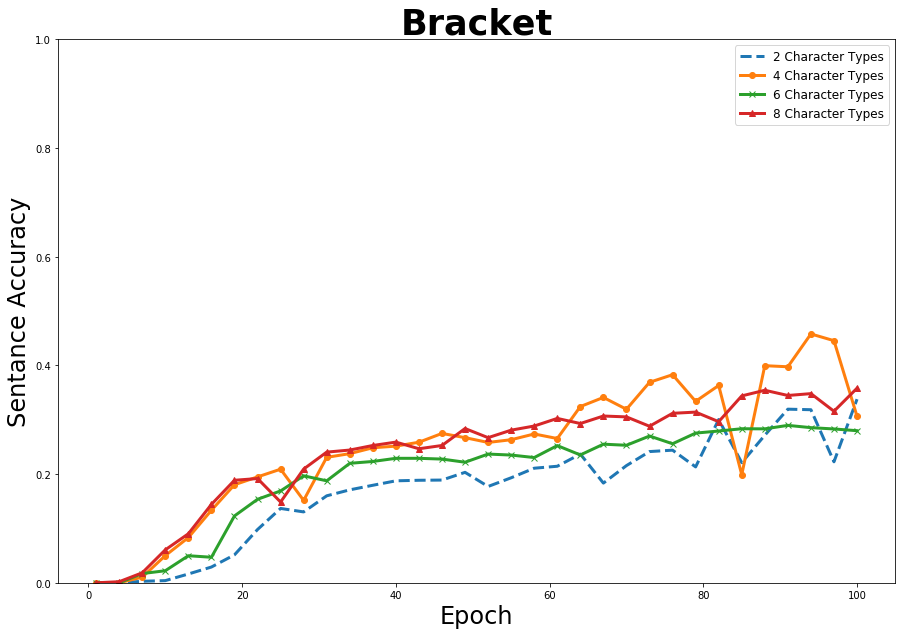

In [10]:
epochs = list(range(1, 101, 1))
plt.figure(figsize=(15,10))
plt.plot(epochs[::3], character_accuracy[0][::3], '--', LineWidth=3, label="2 Character Types")
plt.plot(epochs[::3], character_accuracy[1][::3], '-o', LineWidth=3, label="4 Character Types")
plt.plot(epochs[::3], character_accuracy[2][::3], '-x', LineWidth=3, label="6 Character Types")
plt.plot(epochs[::3], character_accuracy[3][::3], '-^', LineWidth=3, label="8 Character Types")
plt.legend(loc="best", fontsize=12)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Character Accuracy', fontsize=24)
plt.ylim([0, 1])
plt.title('Bracket', fontsize=35, fontweight=560)
plt.savefig('log/plot/number_of_ctype/bracket_rand_number_of_ctype_to_character_accuracy.png')

plt.figure(figsize=(15,10))
plt.plot(epochs[::3], sentance_accuracy[0][::3], '--', LineWidth=3, label="2 Character Types")
plt.plot(epochs[::3], sentance_accuracy[1][::3], '-o', LineWidth=3, label="4 Character Types")
plt.plot(epochs[::3], sentance_accuracy[2][::3], '-x', LineWidth=3, label="6 Character Types")
plt.plot(epochs[::3], sentance_accuracy[3][::3], '-^', LineWidth=3, label="8 Character Types")
plt.legend(loc="best", fontsize=12)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Sentance Accuracy', fontsize=24)
plt.ylim([0, 1])
plt.title('Bracket', fontsize=35, fontweight=560)
plt.savefig('log/plot/number_of_ctype/bracket_rand_number_of_ctype_to_sentance_accuracy.png')

In [11]:
print(character_accuracy[0])
print(character_accuracy[1])
print(character_accuracy[2])
print(character_accuracy[3])

[0.09297605417352918, 0.11219210540816889, 0.11919033595180221, 0.12835293613425827, 0.15456109522614142, 0.21903910559797216, 0.1698616885144526, 0.20766927697196422, 0.2481463566954637, 0.2453207369265339, 0.2495086544172121, 0.3389029370526612, 0.3294219571779314, 0.3352323865619279, 0.3089997367244852, 0.3272055447047947, 0.3799831013855639, 0.3333190470650903, 0.41174759837626357, 0.3908447470412118, 0.35792000097962984, 0.4462519975264347, 0.4474765348044108, 0.4145732181451934, 0.5073962051589755, 0.5063890232478402, 0.4193397294997153, 0.5589675926209383, 0.4355740324624832, 0.557244056402187, 0.5133933764778634, 0.55939618066823, 0.5486263753084303, 0.6030448119416876, 0.6050591757639582, 0.6171882175023113, 0.6178831424075627, 0.6361318091926014, 0.6476087848304322, 0.6232037568803688, 0.6726291427626786, 0.5844808268075701, 0.6798937101642717, 0.6512762739779706, 0.6293846087909531, 0.6962535281980322, 0.6884317963349599, 0.6787059090046349, 0.6916921268375712, 0.71906665768

In [12]:
print(sentance_accuracy[0])
print(sentance_accuracy[1])
print(sentance_accuracy[2])
print(sentance_accuracy[3])

[0.0, 0.0, 0.0, 0.0, 0.0026, 0.0026, 0.0028, 0.0054, 0.0034, 0.004, 0.0142, 0.0058, 0.0162, 0.015, 0.0112, 0.029, 0.0362, 0.028, 0.0514, 0.093, 0.069, 0.098, 0.124, 0.1172, 0.1368, 0.1258, 0.1434, 0.1304, 0.1508, 0.144, 0.16, 0.16, 0.1432, 0.171, 0.128, 0.1754, 0.1794, 0.1782, 0.1866, 0.1876, 0.1954, 0.1782, 0.1886, 0.1942, 0.1962, 0.189, 0.1646, 0.2034, 0.2032, 0.192, 0.1968, 0.1772, 0.1986, 0.2078, 0.1932, 0.2206, 0.1558, 0.2108, 0.2362, 0.211, 0.2144, 0.17, 0.2374, 0.2368, 0.2068, 0.243, 0.1834, 0.2334, 0.2418, 0.2156, 0.2366, 0.2298, 0.2414, 0.2462, 0.2162, 0.244, 0.2572, 0.2686, 0.2132, 0.2826, 0.2124, 0.3004, 0.2592, 0.2708, 0.221, 0.2342, 0.3502, 0.2714, 0.1892, 0.3054, 0.3194, 0.2858, 0.3152, 0.3184, 0.2646, 0.253, 0.2226, 0.3404, 0.2824, 0.3378]
[0.0, 0.0, 0.0, 0.0, 0.0118, 0.0154, 0.0104, 0.001, 0.0162, 0.05, 0.0568, 0.0644, 0.0832, 0.11, 0.1354, 0.1334, 0.1446, 0.1362, 0.1804, 0.1816, 0.1672, 0.1948, 0.2028, 0.1494, 0.209, 0.2092, 0.203, 0.1516, 0.223, 0.221, 0.2308, 0.2304,